Author: Kishan Choudhury

Introduction:

The following is an analysis of a dataset of passengers aboard the Titanic. The description of the dataset is present in the 
below link:

https://www.kaggle.com/c/titanic/data

In this analysis, we are going to think of some interesting questions and then explore the data with the intention of answering those questions.

In [116]:
import pandas as pd
import numpy as np
#file placed in the folder from where ipython notebook has been started
Titanic_data=pd.read_csv('titanic_data.csv',header=0)
#checking sample rows
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Questions to be Answered:
1.What factors affect the survival of a passenger? Does survival depend on Age,Sex,Pclass?

In [117]:
#Get basic statistics
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#Observations:
The total count of Age is 714 , which is different as compared to other columns.
After going through the file, we see that there are lots of blank values for age.
#Resolution:

-Need to replace blank with Mean age of group. It would make sense to replace blank value for females with mean for females, blank for males with mean for males

-Age is a continuous dimension. We can split it into groups so that individuals can be fit into various age groups.



In [118]:
#data wrangling:
#Step1
#Replace Blank Values by Age by Mean of Age for that group

grouped_data=Titanic_data.groupby('Sex')

female_avg_age=grouped_data['Age'].get_group('female').mean()
male_avg_age=grouped_data['Age'].get_group('male').mean()

#setting male and female blanks with the means calculated in previous step
Titanic_data.ix[(Titanic_data.Sex=='male')&(Titanic_data.Age.isnull()),'Age']=male_avg_age
Titanic_data.ix[(Titanic_data.Sex=='female')&(Titanic_data.Age.isnull()),'Age']=female_avg_age
Titanic_data.describe()



,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [119]:
#Data Wrangling Step 2: Create a column Age_group which splits the Age into various groups
#function to convert each Age value
def map_age_to_group(x):
    if x<10:
        return '0-9'
    elif x<20:
        return '10-19'
    elif x<30:
        return '20-29'
    elif x<40:
        return '30-39'
    elif x<50:
        return '40-49'
    elif x<60:
        return '50-59'
    elif x<70:
        return '60-69'
    elif x<80:
        return '70-79'
    else:
        return '80+'

#function to convert a series    
def convert_Age_series_to_Age_group(Age):
    return Age.apply(map_age_to_group)

Age_group=convert_Age_series_to_Age_group(Titanic_data['Age'])
#Adding the column to the original dataframe
Titanic_data['Age_group'] = Age_group
Titanic_data.head()
    


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


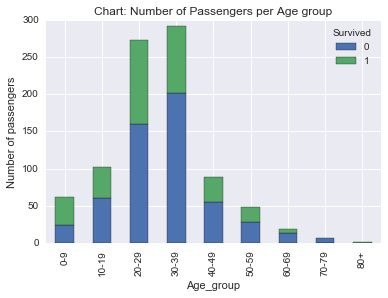

In [120]:
#Analysis of dependency on Age
#We create a stacked bar chart to analyze the dependency

%pylab inline
Age_dependency=Titanic_data.groupby(['Age_group','Survived'])['PassengerId'].count().unstack().fillna(0)
Age_dependency.plot(kind='bar',stacked=True)
pylab.ylabel('Number of passengers')
pylab.title('Chart: Number of Passengers per Age group')
show()


Inference: For every age group, the ratio of Survived : Not Survived seems to be almost the same.
To be sure, lets find the percentage of survivors within every age group

In [121]:
Age_dependency['Total']=Age_dependency.sum(axis=1)

Age_dependency.ix[:,[0,1]].div(Age_dependency['Total'],axis=0)



Survived,0,1
Age_group,,
0-9,0.387097,0.612903
10-19,0.598039,0.401961
20-29,0.586081,0.413919
30-39,0.694158,0.305842
40-49,0.617978,0.382022
50-59,0.583333,0.416667
60-69,0.684211,0.315789
70-79,1.000000,0.000000
80+,0.000000,1.000000


Inference: 
The only interesting figure is that for Age_group 0-9 the Survival percentage is significantly higher compared to
rest of the groups. So, we can see that preference was given to children.
Apart from that, there are no patterns here.

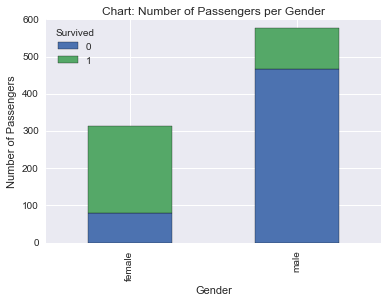

In [122]:
#Analyze correlation between sex of the individual and whether the person survived
Titanic_data.groupby(['Sex','Survived'])['PassengerId'].count().unstack().plot(kind='bar',stacked=True)
pylab.xlabel('Gender')
pylab.ylabel('Number of Passengers')
pylab.title('Chart: Number of Passengers per Gender')
show()


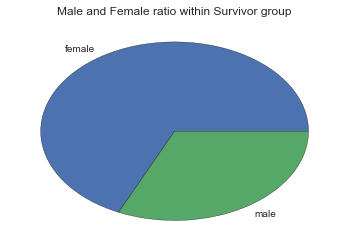

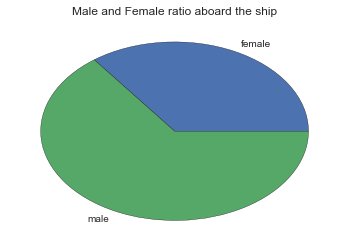

In [123]:
#Let's look at this from another perspective. Lets try to see the ratio of males to females in the survivors

Titanic_data[Titanic_data['Survived']==1].groupby('Sex')['PassengerId'].count().plot(kind='pie')
pylab.title("Male and Female ratio within Survivor group")
pylab.ylabel('')
show()
Titanic_data.groupby('Sex')['PassengerId'].count().plot(kind='pie')
pylab.title("Male and Female ratio aboard the ship")
pylab.ylabel('')
show()

Inference: Even though the total number of males is much higher than the total number of females aboard the ship, 
but when it comes to survivors, the total number of female survivors is much higher than the total number of male survivors.
So, females were given preference.

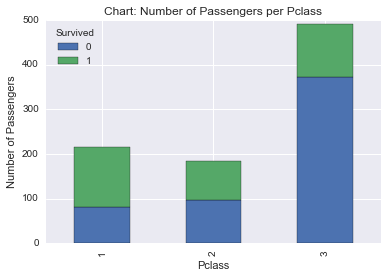

In [124]:
#Dependency on pclass
Titanic_data.groupby(['Pclass','Survived'])['PassengerId'].count().unstack().plot(kind='bar',stacked=True)
pylab.xlabel('Pclass')
pylab.ylabel('Number of Passengers')
pylab.title('Chart: Number of Passengers per Pclass')

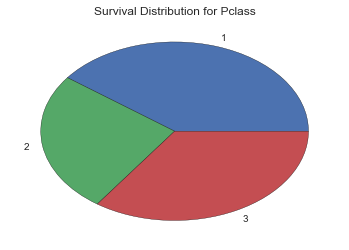

In [125]:
#The above chart shows that the percentage of survivors withing Pclass=1 group was higher compared to other groups. 
#Let's compare the number of survivors among different groups
Titanic_data[Titanic_data['Survived']==1].groupby('Pclass')['PassengerId'].count().plot(kind='pie')
pylab.title('Survival Distribution for Pclass')
pylab.ylabel('')
show()

Inference: On an overall level, the number of survivors from Pclass=1 and Pclass=3 are almost similar 
but the total number of passengers for Pclass=3 was significantly more than number of passengers for Pclass=1

Till now, we have been looking at one variable at a time. But the survival numbers of one variable may be affected by 
some other variable. For eg, in the above charts , we see that the survival ratio for Pclass=1 is higher compared to 
other classes. But that might be due to higher number of females and children in that class. So, in this section, we try 
to look at multiple variables at the same time and figure out if one is affected by the other.

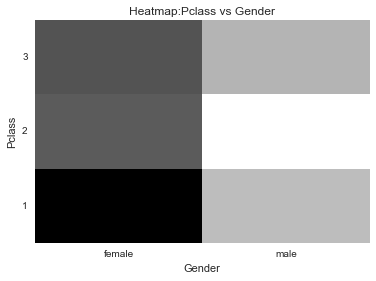

Sex     female  male
Pclass              
1           91    45
2           70    17
3           72    47


In [126]:
#Now, all the variables are mainly categorical data and there is no measure other than the count of people.
# A heat map may provide an interesting perspective to look at such data

import matplotlib.pyplot as plt
#arranging the data and filtering the survivors
Titanic_pivot_survivors=pd.pivot_table(Titanic_data[Titanic_data['Survived']==1],index='Pclass',values='PassengerId',columns='Sex',aggfunc=np.size)
plt.pcolor(Titanic_pivot_survivors)
plt.yticks(np.arange(0.5, len(Titanic_pivot_survivors.index), 1), Titanic_pivot_survivors.index)
plt.xticks(np.arange(0.5, len(Titanic_pivot_survivors.columns), 1), Titanic_pivot_survivors.columns)
plt.xlabel('Gender')
plt.ylabel('Pclass')
plt.title('Heatmap:Pclass vs Gender')
plt.show()
print Titanic_pivot_survivors

Inference: 
From the above plot, it is clear that first preference was given on the basis of Gender, and than on the basis of class.
The interseting point to note here is that , for males , the number of survivors is a bit more for Pclass=3. And also, the overall survival numbers for Pclass=2 is less than Pclass=3. But this shouldn't be the case if preference was given based on class. 

The answer may lie in the total number of passengers in the various classes.

In [127]:
Titanic_pivot_total=pd.pivot_table(Titanic_data,index='Pclass',values='PassengerId',columns='Sex',aggfunc=np.size)

 As expected , the number of passengers is much more in class3 compared to other classes. A better way to analyze may be to
find the percentage of survivors within each category

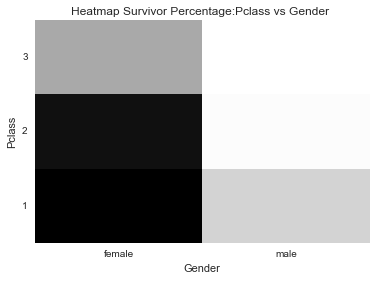

In [128]:
Titanic_pivot_survivor_percentage=(Titanic_pivot_survivors/Titanic_pivot_total)*100
plt.pcolor(Titanic_pivot_survivor_percentage)
plt.yticks(np.arange(0.5, len(Titanic_pivot_survivor_percentage.index), 1), Titanic_pivot_survivor_percentage.index)
plt.xticks(np.arange(0.5, len(Titanic_pivot_survivor_percentage.columns), 1), Titanic_pivot_survivor_percentage.columns)
plt.xlabel('Gender')
plt.ylabel('Pclass')
plt.title('Heatmap Survivor Percentage:Pclass vs Gender ')
plt.show()

Analysis: Age with PClass

In [129]:
# Lets find the mean age of survivors and non-survivors
Titanic_data.groupby('Survived')['Age'].mean()


Survived
0    30.562012
1    28.410122
Name: Age, dtype: float64

Now, we see that the mean age of survivors is a little less than non-survivors. Lets try to understand whether the 
lower age helped the passengers survive.

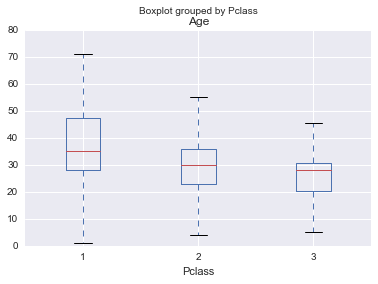

In [133]:
Titanic_data.boxplot(column='Age' ,by='Pclass')

Inference: So, we see that the mean age of passengers from Pclass=3 is a bit higher. So, it doesn't seem from the above graph
that Pclass affected the survival of passengers with lower age. But , we cannot be sure about this data as we have substituted the missing age values with average age of men and women which might have shifted the actual mean.

We can also use the various hypothesis testing methodologies available to test the correlation among variables.
In this section, lets try to use the Chi Square Test for Independence.
The Chi Square test is appropriate when the following conditions are met:

-The sampling method is simple random sampling.

-The variables under study are each categorical.

-If sample data are displayed in a contingency table, the expected frequency count for each cell of the table is at least 5

Since most of our variables are categorical, this test seems appropriate.

We will use this test to find if there is any correlation between Pclass and Survival

There are mainly four steps of this test:

    (1) state the hypotheses, (2) formulate an analysis plan, (3) analyze sample data, and (4) interpret results.
    
Step 1: State the hypotheses

    The null and the alternative hypotheses are stated below:
    
        H0: Variable Pclass and Variable Survived are independent. 
        
        Ha: Variable Pclass and Variable Survived are not independent.
Step 2: Formulate an analysis plan

    We chose the level of Significance=.05
    
    If the p-value is less than the level of significance, we will reject the null hypothesis.
Step 3: Analyze sample data

    Lets choose a random sample of 200 passengers.
    


In [131]:
# Choose a random subset of 200 records from Titanic_data
import random
Sample_data=Titanic_data.ix[random.sample(Titanic_data.index,200)]
#Now, lets create a contingency table
Sample_data_pivot=pd.pivot_table(Sample_data,index='Pclass',values='PassengerId',columns='Survived',aggfunc=np.size)
Sample_data_pivot

Survived,0,1
Pclass,,
1,13,34
2,25,22
3,79,27


Now, degrees of freedom=(r-1)*(c-1)=2

Now, we compute the expected frequency  for each level of one category at each level of another.

E = (nr * nc) / n

We first compute the row and column totals:

    	Survived	
        
Pclass	0	1	Total

    1	13	34	47
    
    2	25	22	47
    
    3	79	27	106
    
Total	117	83	

    
E11=(47*117)/200

E12=(47*83)/200

E21=(47*117)/200

E22=(47*83)/200

E31=(106*117)/200

E32=(106*83)/200

Here is the Expectation table:

	Survived	
    
 Pclass	0       1
 
    1	27.495	19.505
    
    2	27.495	19.505
    
    3	62.01	43.99

Now, we calculate the Test Statistic:
    
Test statistic. The test statistic is a chi-square random variable (Χ2) defined by the following equation.

Χ2 = Σ [ (Or,c - Er,c)^2 / Er,c ]

where Or,c is the observed frequency count at level r of Variable A and level c of Variable B, and Er,c is the expected frequency count at level r of Variable A and level c of Variable B.

So,

X2=((13-27.495)^2)/27.495+((25-27.495)^2)/27.495+((79-62.01)^2)/62.01+((34-19.505)^2)/19.505+((22-19.505)^2)/19.505+((27-43.99)^2)/43.99

X2=30.17599

Now, we calculate the P-value using Chi Square Calculator

P(X2>30.17599)=0

So, we get a probability of 0.

Hence, we reject the null hypothesis and it proves that Pclass and Survived variables are not independent.


Conclusion: 
We have looked into the data in various ways to answer the questions we started with.
We found that Survival percentage for children was high. The Age group 0-9 had survival percentage of 38.7 percent, which is much higher compared to other age groups
From the box plots, we found that survival percentage for females is much higher than the males.
From the Chi Square Test, it has been proved that, Survival and Pclass are not independent.

Limitations:
There were lots of null values in the Age data which we filled with mean age for men and women. This might have shifted the actual mean  for Age for the passengers. Hence, we could not look into the Age data with much confidence. A better approach might be to use K-means clustering to cluster the passengers and then assign the mean age of the clusters to the missing values.